In [2]:
import tensorflow.keras
import pandas as pd

### 영화 리뷰 분류(이진분류)
* 리뷰데이터 : 50,000
* 훈련데이터 : 25,000, 테스트데이터 : 25,000
* 긍정 : 50%, 부정 : 50%
* data size : 약 17G

In [3]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = \
                imdb.load_data(num_words=10000)

In [4]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [5]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [6]:
len(train_data), len(test_data)

(25000, 25000)

In [7]:
len(train_data[0]), len(train_data[1]), len(train_data[2])

(218, 189, 141)

In [8]:
type(train_data), type(train_labels)

(numpy.ndarray, numpy.ndarray)

In [9]:
train_data_df = pd.DataFrame(train_data)
train_labels_df = pd.DataFrame(train_labels)

movie_df = pd.DataFrame(train_data_df)
movie_df.columns=['train_data']
movie_df['train_labels'] = train_labels_df
movie_df

,train_data,train_labels
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...",1
1,"[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...",0
2,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...",0
3,"[1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...",1
4,"[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...",0
...,...,...
24995,"[1, 14, 9, 6, 2758, 20, 21, 1517, 7, 2078, 5, ...",1
24996,"[1, 4679, 2784, 299, 6, 1042, 37, 80, 81, 233,...",0
24997,"[1, 11, 6, 230, 245, 6401, 9, 6, 1225, 446, 2,...",0
24998,"[1, 1446, 7079, 69, 72, 3305, 13, 610, 930, 8,...",1


In [10]:
movie_df.shape

(25000, 2)

In [11]:
movie_df.dtypes

train_data      object
train_labels     int64
dtype: object

In [12]:
# null값 확인
movie_df.isnull()

,train_data,train_labels
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
24995,False,False
24996,False,False
24997,False,False
24998,False,False


In [13]:
movie_df.isna()

,train_data,train_labels
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
24995,False,False
24996,False,False
24997,False,False
24998,False,False


In [14]:
movie_df.isnull().sum()

train_data      0
train_labels    0
dtype: int64

In [15]:
movie_df.isna().sum()

train_data      0
train_labels    0
dtype: int64

In [16]:
movie_df.isnull().sum().sum()

0

In [17]:
movie_df.isna().sum().sum()

0

In [18]:
movie_df

,train_data,train_labels
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...",1
1,"[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...",0
2,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...",0
3,"[1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...",1
4,"[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...",0
...,...,...
24995,"[1, 14, 9, 6, 2758, 20, 21, 1517, 7, 2078, 5, ...",1
24996,"[1, 4679, 2784, 299, 6, 1042, 37, 80, 81, 233,...",0
24997,"[1, 11, 6, 230, 245, 6401, 9, 6, 1225, 446, 2,...",0
24998,"[1, 1446, 7079, 69, 72, 3305, 13, 610, 930, 8,...",1


In [19]:
movie_df['train_data']

0        [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...
1        [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...
2        [1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...
3        [1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...
4        [1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...
                               ...                        
24995    [1, 14, 9, 6, 2758, 20, 21, 1517, 7, 2078, 5, ...
24996    [1, 4679, 2784, 299, 6, 1042, 37, 80, 81, 233,...
24997    [1, 11, 6, 230, 245, 6401, 9, 6, 1225, 446, 2,...
24998    [1, 1446, 7079, 69, 72, 3305, 13, 610, 930, 8,...
24999    [1, 17, 6, 194, 337, 7, 4, 204, 22, 45, 254, 8...
Name: train_data, Length: 25000, dtype: object

In [20]:
movie_df.iloc[:,0]

0        [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...
1        [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...
2        [1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...
3        [1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...
4        [1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...
                               ...                        
24995    [1, 14, 9, 6, 2758, 20, 21, 1517, 7, 2078, 5, ...
24996    [1, 4679, 2784, 299, 6, 1042, 37, 80, 81, 233,...
24997    [1, 11, 6, 230, 245, 6401, 9, 6, 1225, 446, 2,...
24998    [1, 1446, 7079, 69, 72, 3305, 13, 610, 930, 8,...
24999    [1, 17, 6, 194, 337, 7, 4, 204, 22, 45, 254, 8...
Name: train_data, Length: 25000, dtype: object

In [21]:
movie_df.loc[:]['train_data']

0        [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...
1        [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...
2        [1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...
3        [1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...
4        [1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...
                               ...                        
24995    [1, 14, 9, 6, 2758, 20, 21, 1517, 7, 2078, 5, ...
24996    [1, 4679, 2784, 299, 6, 1042, 37, 80, 81, 233,...
24997    [1, 11, 6, 230, 245, 6401, 9, 6, 1225, 446, 2,...
24998    [1, 1446, 7079, 69, 72, 3305, 13, 610, 930, 8,...
24999    [1, 17, 6, 194, 337, 7, 4, 204, 22, 45, 254, 8...
Name: train_data, Length: 25000, dtype: object

In [22]:
[max(sequence) for sequence in train_data]

[7486,
 9837,
 6905,
 9941,
 7224,
 7982,
 9363,
 9820,
 7612,
 8419,
 8914,
 7412,
 9667,
 9106,
 6640,
 9671,
 9263,
 9935,
 8742,
 9580,
 9859,
 8793,
 7609,
 9462,
 9075,
 8614,
 8887,
 5898,
 9637,
 9212,
 9771,
 9209,
 8257,
 7778,
 9877,
 9753,
 7015,
 9902,
 8427,
 8867,
 8406,
 9579,
 9529,
 7056,
 7023,
 9922,
 5811,
 9124,
 9910,
 8795,
 7799,
 7146,
 9978,
 7999,
 9565,
 9731,
 9095,
 9888,
 5247,
 9655,
 4852,
 9939,
 9018,
 9885,
 7239,
 9636,
 9389,
 9561,
 9673,
 9147,
 9956,
 9448,
 8520,
 9360,
 9765,
 9025,
 9928,
 8352,
 9960,
 7320,
 8318,
 7881,
 9715,
 9851,
 9266,
 9055,
 8894,
 9719,
 9271,
 7311,
 8791,
 9918,
 9486,
 9867,
 9283,
 7707,
 9133,
 9055,
 9978,
 8013,
 8448,
 8700,
 9906,
 7517,
 9962,
 6266,
 6903,
 9815,
 9976,
 9273,
 9413,
 8931,
 8631,
 9685,
 9419,
 9964,
 7361,
 9052,
 9482,
 9643,
 9865,
 9819,
 7181,
 2775,
 9709,
 9977,
 8916,
 4431,
 9700,
 6532,
 8836,
 9926,
 6781,
 7614,
 5418,
 8881,
 9841,
 9615,
 9072,
 9831,
 6891,
 8827,
 9019,

In [23]:
len([max(sequence) for sequence in train_data])

25000

In [24]:
max([max(sequence) for sequence in train_data])

9999

In [25]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [26]:
train_data[1]

[1,
 194,
 1153,
 194,
 8255,
 78,
 228,
 5,
 6,
 1463,
 4369,
 5012,
 134,
 26,
 4,
 715,
 8,
 118,
 1634,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 3103,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2300,
 1523,
 5,
 647,
 4,
 116,
 9,
 35,
 8163,
 4,
 229,
 9,
 340,
 1322,
 4,
 118,
 9,
 4,
 130,
 4901,
 19,
 4,
 1002,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 1543,
 1905,
 398,
 4,
 1649,
 26,
 6853,
 5,
 163,
 11,
 3215,
 2,
 4,
 1153,
 9,
 194,
 775,
 7,
 8255,
 2,
 349,
 2637,
 148,
 605,
 2,
 8003,
 15,
 123,
 125,
 68,
 2,
 6853,
 15,
 349,
 165,
 4362,
 98,
 5,
 4,
 228,
 9,
 43,
 2,
 1157,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 4373,
 228,
 8255,
 5,
 2,
 656,
 245,
 2350,
 5,
 4,
 9837,
 131,
 152,
 491,
 18,
 2,
 32,
 7464,
 1212,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 1382,
 9,
 8,
 168,
 145,
 23,
 4,
 1690,
 15,
 16,
 4,
 1355,
 5,
 28,
 6,
 52,
 154,
 462,
 33,
 89,
 78,
 2

In [27]:
for i in train_data[1]:
    print(i)

1
194
1153
194
8255
78
228
5
6
1463
4369
5012
134
26
4
715
8
118
1634
14
394
20
13
119
954
189
102
5
207
110
3103
21
14
69
188
8
30
23
7
4
249
126
93
4
114
9
2300
1523
5
647
4
116
9
35
8163
4
229
9
340
1322
4
118
9
4
130
4901
19
4
1002
5
89
29
952
46
37
4
455
9
45
43
38
1543
1905
398
4
1649
26
6853
5
163
11
3215
2
4
1153
9
194
775
7
8255
2
349
2637
148
605
2
8003
15
123
125
68
2
6853
15
349
165
4362
98
5
4
228
9
43
2
1157
15
299
120
5
120
174
11
220
175
136
50
9
4373
228
8255
5
2
656
245
2350
5
4
9837
131
152
491
18
2
32
7464
1212
14
9
6
371
78
22
625
64
1382
9
8
168
145
23
4
1690
15
16
4
1355
5
28
6
52
154
462
33
89
78
285
16
145
95


In [28]:
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [29]:
reverse_word_index = dict([(value, key) \
                           for (key, value) in word_index.items()])
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [30]:
word_index = imdb.get_word_index()
a = list(word_index.items())
a

[('fawn', 34701),
 ('tsukino', 52006),
 ('nunnery', 52007),
 ('sonja', 16816),
 ('vani', 63951),
 ('woods', 1408),
 ('spiders', 16115),
 ('hanging', 2345),
 ('woody', 2289),
 ('trawling', 52008),
 ("hold's", 52009),
 ('comically', 11307),
 ('localized', 40830),
 ('disobeying', 30568),
 ("'royale", 52010),
 ("harpo's", 40831),
 ('canet', 52011),
 ('aileen', 19313),
 ('acurately', 52012),
 ("diplomat's", 52013),
 ('rickman', 25242),
 ('arranged', 6746),
 ('rumbustious', 52014),
 ('familiarness', 52015),
 ("spider'", 52016),
 ('hahahah', 68804),
 ("wood'", 52017),
 ('transvestism', 40833),
 ("hangin'", 34702),
 ('bringing', 2338),
 ('seamier', 40834),
 ('wooded', 34703),
 ('bravora', 52018),
 ('grueling', 16817),
 ('wooden', 1636),
 ('wednesday', 16818),
 ("'prix", 52019),
 ('altagracia', 34704),
 ('circuitry', 52020),
 ('crotch', 11585),
 ('busybody', 57766),
 ("tart'n'tangy", 52021),
 ('burgade', 14129),
 ('thrace', 52023),
 ("tom's", 11038),
 ('snuggles', 52025),
 ('francesco', 29114),

In [31]:
sorted(word_index)

['\x08\x08\x08\x08a',
 '\x10own',
 "'",
 "''",
 "''a",
 "''after",
 "''bad",
 "''cannibal",
 "''clients''",
 "''dark''",
 "''empire",
 "''family",
 "''gaslight''",
 "''heart''",
 "''high",
 "''holy",
 "''human''",
 "''humans''",
 "''i'm",
 "''if",
 "''inuyasha''",
 "''little''",
 "''maison",
 "''ned''",
 "''negative''",
 "''nice",
 "''oh",
 "''on",
 "''oversexed''",
 "''peeping",
 "''professionals''",
 "''ranma",
 "''raptors''",
 "''return",
 "''saint",
 "''scarface''",
 "''sea",
 "''talent",
 "''terrorists''",
 "''the",
 "''their",
 "''this",
 "''thunderball",
 "''troubled''",
 "''unpleasant",
 "''villain",
 "''voyeur''",
 "''we're",
 "''while''",
 "''your",
 "''zero",
 "'0",
 "'00s",
 "'01",
 "'02",
 "'03",
 "'04",
 "'05",
 "'06",
 "'07",
 "'08",
 "'1",
 "'1'",
 "'10",
 "'10'",
 "'12",
 "'1408'",
 "'1902'",
 "'1909",
 "'1940'",
 "'2'",
 "'2001",
 "'20s",
 "'24",
 "'24'",
 "'28",
 "'30",
 "'30's",
 "'30s",
 "'34",
 "'38",
 "'39",
 "'3rd",
 "'4",
 "'4'",
 "'40",
 "'40's",
 "'40s",
 "'4

In [32]:
sorted(reverse_word_index)

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [33]:
reverse_word_index[1]

'the'

In [34]:
type(reverse_word_index)

dict

In [35]:
train_data[17]

[1,
 33,
 4,
 5673,
 7,
 4,
 2,
 194,
 2,
 3089,
 3438,
 11,
 4131,
 1237,
 2,
 2,
 5,
 4,
 522,
 2,
 2,
 13,
 8474,
 23,
 35,
 3077,
 9731,
 148,
 2,
 503,
 503,
 758,
 451,
 37,
 5535,
 4,
 123,
 103,
 153,
 7,
 6397,
 2,
 2,
 8021,
 141,
 17,
 2,
 2,
 2,
 2,
 2,
 13,
 197,
 36,
 71,
 112,
 2,
 5,
 301,
 38,
 2,
 2808,
 320,
 893,
 2,
 16,
 95,
 1376,
 83,
 4,
 3743,
 19,
 49,
 7197,
 46,
 12,
 69,
 2684,
 35,
 631,
 284,
 2,
 56,
 73,
 422,
 21,
 488,
 6239,
 69,
 1452,
 11,
 2853,
 17,
 6,
 430,
 5,
 4597,
 2,
 2,
 4,
 3769,
 2,
 4909,
 4,
 635,
 29,
 839,
 8,
 27,
 239,
 17,
 2,
 2,
 2,
 4,
 3212,
 1395,
 109,
 284,
 2,
 2,
 301,
 11,
 6,
 5125,
 664,
 2,
 2,
 4,
 2,
 15,
 29,
 16,
 3072,
 54,
 29,
 557,
 6239,
 69,
 5955,
 4,
 217,
 21,
 1283,
 57,
 1395,
 284,
 100,
 28,
 256,
 15,
 217,
 17,
 73,
 17,
 6239,
 849,
 10,
 10,
 2,
 16,
 4050,
 5,
 2,
 4236,
 123,
 8,
 2,
 2,
 82,
 270,
 11,
 7627,
 4,
 2,
 631,
 513,
 7,
 2,
 23,
 2019,
 69,
 77,
 2959,
 34,
 4,
 893,
 9147,
 2,
 

In [36]:
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') \
                           for i in train_data[17]])

In [37]:
decoded_review

"? at the height of the ? big ? racism row in 2007 involving ? ? and the late ? ? i condemned on an internet forum those ? b b ' fans who praised the show after years of bashing ? ? sitcoms such as ? ? ? ? ? i thought they were being ? and said so ? ain't half hot ? was then thrown into the argument with some pointing out it had starred an english actor ? up well yes but michael bates had lived in india as a boy and spoke ? ? the show's ? overlook the reality he brought to his performance as ? ? ? the noted indian character actor ? ? said in a 1995 documentary ? ? the ? that he was upset when he heard bates had landed the role but added no indian actor could have played that role as well as bates indeed br br ? was perry and ? companion show to ? ? also set in wartime the ? english town of ? on sea had been replaced by the hot steamy ? of india in particularly a place called ? where an army concert party puts on shows for the troops among them ? ? george ? his first sitcom role since ?

In [38]:
train_data[17]

[1,
 33,
 4,
 5673,
 7,
 4,
 2,
 194,
 2,
 3089,
 3438,
 11,
 4131,
 1237,
 2,
 2,
 5,
 4,
 522,
 2,
 2,
 13,
 8474,
 23,
 35,
 3077,
 9731,
 148,
 2,
 503,
 503,
 758,
 451,
 37,
 5535,
 4,
 123,
 103,
 153,
 7,
 6397,
 2,
 2,
 8021,
 141,
 17,
 2,
 2,
 2,
 2,
 2,
 13,
 197,
 36,
 71,
 112,
 2,
 5,
 301,
 38,
 2,
 2808,
 320,
 893,
 2,
 16,
 95,
 1376,
 83,
 4,
 3743,
 19,
 49,
 7197,
 46,
 12,
 69,
 2684,
 35,
 631,
 284,
 2,
 56,
 73,
 422,
 21,
 488,
 6239,
 69,
 1452,
 11,
 2853,
 17,
 6,
 430,
 5,
 4597,
 2,
 2,
 4,
 3769,
 2,
 4909,
 4,
 635,
 29,
 839,
 8,
 27,
 239,
 17,
 2,
 2,
 2,
 4,
 3212,
 1395,
 109,
 284,
 2,
 2,
 301,
 11,
 6,
 5125,
 664,
 2,
 2,
 4,
 2,
 15,
 29,
 16,
 3072,
 54,
 29,
 557,
 6239,
 69,
 5955,
 4,
 217,
 21,
 1283,
 57,
 1395,
 284,
 100,
 28,
 256,
 15,
 217,
 17,
 73,
 17,
 6239,
 849,
 10,
 10,
 2,
 16,
 4050,
 5,
 2,
 4236,
 123,
 8,
 2,
 2,
 82,
 270,
 11,
 7627,
 4,
 2,
 631,
 513,
 7,
 2,
 23,
 2019,
 69,
 77,
 2959,
 34,
 4,
 893,
 9147,
 2,
 

In [39]:
reverse_word_index[30], reverse_word_index[1]

('at', 'the')

### 데이터 준비

In [40]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    print()
    return results

x_train = vectorize_sequences(train_data).astype('float32')
x_test = vectorize_sequences(test_data).astype('float32')

In [41]:
import numpy as np
aa = np.zeros((5, 6))
aa[1, [0,2]] = 1.0
aa

array([[0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [42]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [43]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [44]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 신경망 모델 만들기

![3-layer network](https://s3.amazonaws.com/book.keras.io/img/ch3/3_layer_network.png)

In [45]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [46]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 훈련 검증

In [47]:
x_val = x_train[:10000].astype(float)
partial_x_train = x_train[10000:].astype(float)

y_val = y_train[:10000].astype(float)
partial_y_train = y_train[10000:].astype(float)

In [48]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 63ms/step - loss: 0.5040 - accuracy: 0.7809 - val_loss: 0.4132 - val_accuracy: 0.8282
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3105 - accuracy: 0.8994 - val_loss: 0.3062 - val_accuracy: 0.8868
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2345 - accuracy: 0.9221 - val_loss: 0.2919 - val_accuracy: 0.8843
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1899 - accuracy: 0.9383 - val_loss: 0.2827 - val_accuracy: 0.8862
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1619 - accuracy: 0.9466 - val_loss: 0.2764 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1369 - accuracy: 0.9566 - val_loss: 0.2897 - val_accuracy: 0.8849
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1195 - accuracy: 0.9627 - val_loss: 0.2970 - val_accuracy: 0.8823
Epoch 8/20
30

In [49]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [50]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.0198 - accuracy: 0.9964 - val_loss: 0.5618 - val_accuracy: 0.8699
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0140 - accuracy: 0.9978 - val_loss: 0.5766 - val_accuracy: 0.8705
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0116 - accuracy: 0.9985 - val_loss: 0.6011 - val_accuracy: 0.8698
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0096 - accuracy: 0.9990 - val_loss: 0.6287 - val_accuracy: 0.8670
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0101 - accuracy: 0.9984 - val_loss: 0.6410 - val_accuracy: 0.8690
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0050 - accuracy: 0.9999 - val_loss: 0.6601 - val_accuracy: 0.8675
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0109 - accuracy: 0.9979 - val_loss: 0.6770 - val_accuracy: 0.8692
Epoch 8/20
30

In [51]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [52]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [53]:
acc

[0.996399998664856,
 0.9977999925613403,
 0.998533308506012,
 0.9990000128746033,
 0.9983999729156494,
 0.9998666644096375,
 0.997866690158844,
 0.9998666644096375,
 0.9989333152770996,
 0.9975333213806152,
 0.9998666644096375,
 0.9998000264167786,
 0.9999333620071411,
 0.998533308506012,
 1.0,
 0.9998666644096375,
 0.9999333620071411,
 0.998533308506012,
 1.0,
 1.0]

In [54]:
import matplotlib.pyplot as plt

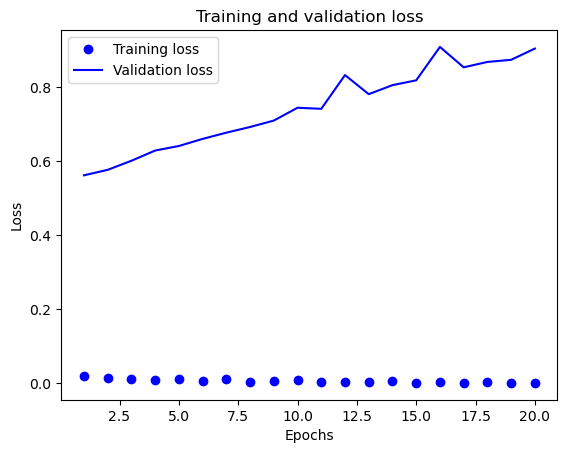

In [55]:
epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

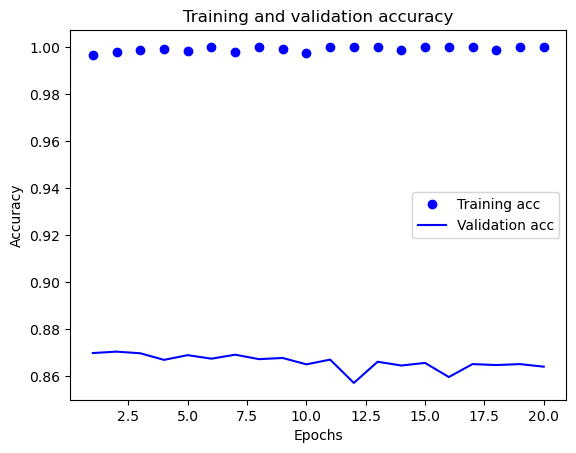

In [56]:
plt.clf()   # 그래프를 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [57]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4389 - accuracy: 0.8096
Epoch 2/4
49/49 [==============================] - 1s 17ms/step - loss: 0.2581 - accuracy: 0.9021
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2034 - accuracy: 0.9220
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3102 - accuracy: 0.8797


In [58]:
results # [0.32722774147987366, 0.8763200044631958]

[0.3101920783519745, 0.8797199726104736]

### 훈련 검증

In [59]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.2421935 ],
       [0.999836  ],
       [0.77680874],
       ...,
       [0.125039  ],
       [0.07567223],
       [0.6536074 ]], dtype=float32)